# **Prompt Used For Data Set Creation**


generate a cybersecurity threat dataset in csv format where the dataset should be concise,easy to understand interpret and useful for data analysis and the Csv should be saved as cybersecurity_threats.csv


In [1]:
import pandas as pd
import numpy as np

# Define the number of entries in the dataset
num_entries = 100

# Generate synthetic data for various cybersecurity threat attributes
threat_ids = [f"T{i:04d}" for i in range(num_entries)]

threat_types = np.random.choice([
    "Phishing", "Malware", "DDoS", "Ransomware",
    "Insider Threat", "SQL Injection", "XSS (Cross-Site Scripting)",
    "Zero-Day Exploit", "Supply Chain Attack", "Credential Stuffing"
], num_entries)

severities = np.random.choice(["Low", "Medium", "High", "Critical"], num_entries, p=[0.3, 0.4, 0.2, 0.1])

detection_dates = pd.to_datetime(np.random.choice(
    pd.date_range('2022-01-01', '2023-12-31'), num_entries
)).strftime('%Y-%m-%d')

target_systems = np.random.choice([
    "Web Server", "Database Server", "Employee Workstation",
    "Cloud Infrastructure", "Mobile Device", "IoT Device", "Network Device"
], num_entries)

attack_vectors = np.random.choice([
    "Email", "Vulnerability Exploitation", "Social Engineering",
    "Weak Credentials", "Misconfiguration", "Supply Chain Compromise", "Drive-by Download"
], num_entries)

statuses = np.random.choice(["Detected", "Mitigated", "Resolved", "Investigating"], num_entries, p=[0.4, 0.3, 0.2, 0.1])

impacts = np.random.choice([
    "Data Breach", "System Downtime", "Financial Loss",
    "Reputation Damage", "Service Disruption", "Intellectual Property Theft"
], num_entries)

# Create a dictionary to hold the data
data = {
    'Threat_ID': threat_ids,
    'Threat_Type': threat_types,
    'Severity': severities,
    'Detection_Date': detection_dates,
    'Target_System': target_systems,
    'Attack_Vector': attack_vectors,
    'Status': statuses,
    'Impact': impacts
}

# Create the DataFrame
df = pd.DataFrame(data)

# Define the CSV file name
csv_filename = 'cybersecurity_threats.csv'

# Save the DataFrame to a CSV file
df.to_csv(csv_filename, index=False)

print(f"Successfully generated '{csv_filename}' with {num_entries} entries.")
print("Here's a preview of the dataset:")
print(df.head())

Successfully generated 'cybersecurity_threats.csv' with 100 entries.
Here's a preview of the dataset:
  Threat_ID          Threat_Type  Severity Detection_Date  \
0     T0000  Supply Chain Attack  Critical     2022-03-05   
1     T0001             Phishing    Medium     2023-12-02   
2     T0002           Ransomware    Medium     2023-09-05   
3     T0003       Insider Threat  Critical     2022-02-13   
4     T0004           Ransomware       Low     2023-10-07   

          Target_System      Attack_Vector     Status             Impact  
0            Web Server   Misconfiguration   Detected     Financial Loss  
1            Web Server  Drive-by Download  Mitigated        Data Breach  
2            IoT Device  Drive-by Download   Detected  Reputation Damage  
3  Cloud Infrastructure              Email  Mitigated     Financial Loss  
4  Employee Workstation  Drive-by Download  Mitigated     Financial Loss  


## **Prompt Used for Understanding the Dataset**

get the size and structure overview of dataset

In [3]:
print("\nDataset Shape (Rows, Columns):")
print(df.shape)

print("\nDataset Information:")
df.info()


Dataset Shape (Rows, Columns):
(100, 8)

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Threat_ID       100 non-null    object
 1   Threat_Type     100 non-null    object
 2   Severity        100 non-null    object
 3   Detection_Date  100 non-null    object
 4   Target_System   100 non-null    object
 5   Attack_Vector   100 non-null    object
 6   Status          100 non-null    object
 7   Impact          100 non-null    object
dtypes: object(8)
memory usage: 6.4+ KB


## **Prompt used for Analyzing the different types of Cyberthreat attacks**

analyse the different types of cyber threats and visualize using appropriate charts

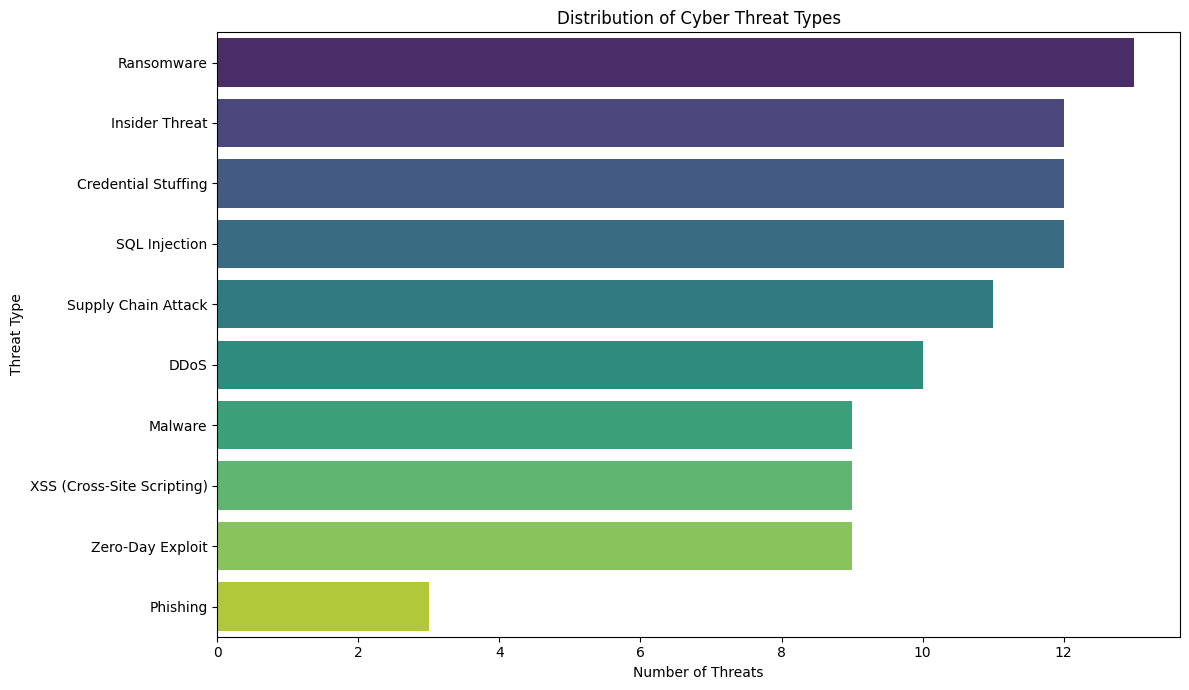

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each threat type
threat_type_counts = df['Threat_Type'].value_counts().reset_index()
threat_type_counts.columns = ['Threat_Type', 'Count']

# Create a bar chart for threat type distribution
plt.figure(figsize=(12, 7))
sns.barplot(x='Count', y='Threat_Type', data=threat_type_counts, hue='Threat_Type', palette='viridis', legend=False)
plt.title('Distribution of Cyber Threat Types')
plt.xlabel('Number of Threats')
plt.ylabel('Threat Type')
plt.tight_layout()
plt.show()

## **Prompt used for Analysis of Most Devices Affected**

identify which cyber atack devices affected the most using possible visual charts

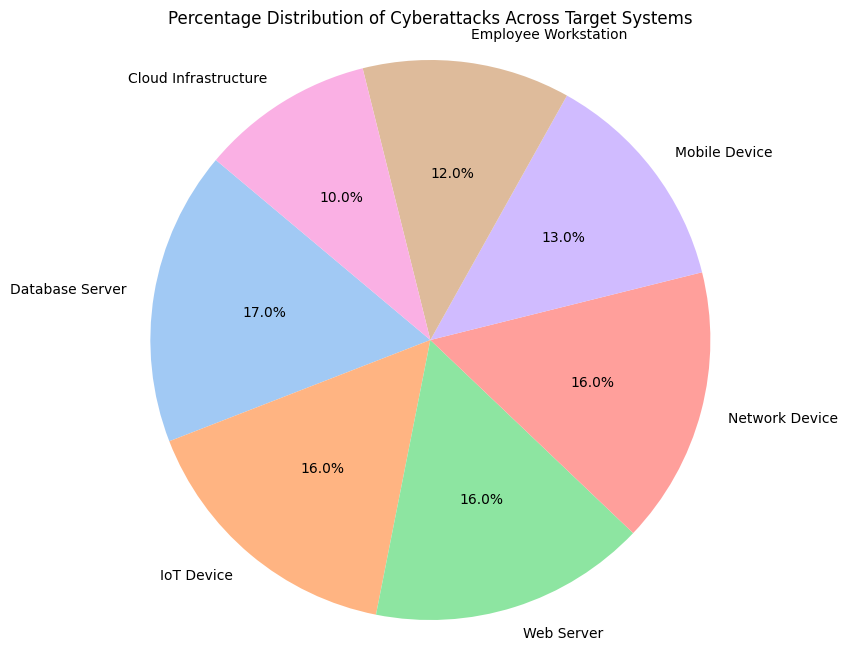

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each target system (already computed, but re-doing for completeness in a new cell)
target_system_counts = df['Target_System'].value_counts().reset_index()
target_system_counts.columns = ['Target_System', 'Count']

# Create a pie chart for target system distribution
plt.figure(figsize=(10, 8))
plt.pie(target_system_counts['Count'], labels=target_system_counts['Target_System'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Percentage Distribution of Cyberattacks Across Target Systems')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

## **Prompt used for Analysis of Cyberthreat attacks over timeperiod**

Analyse the cyberthreats attacks by using time series

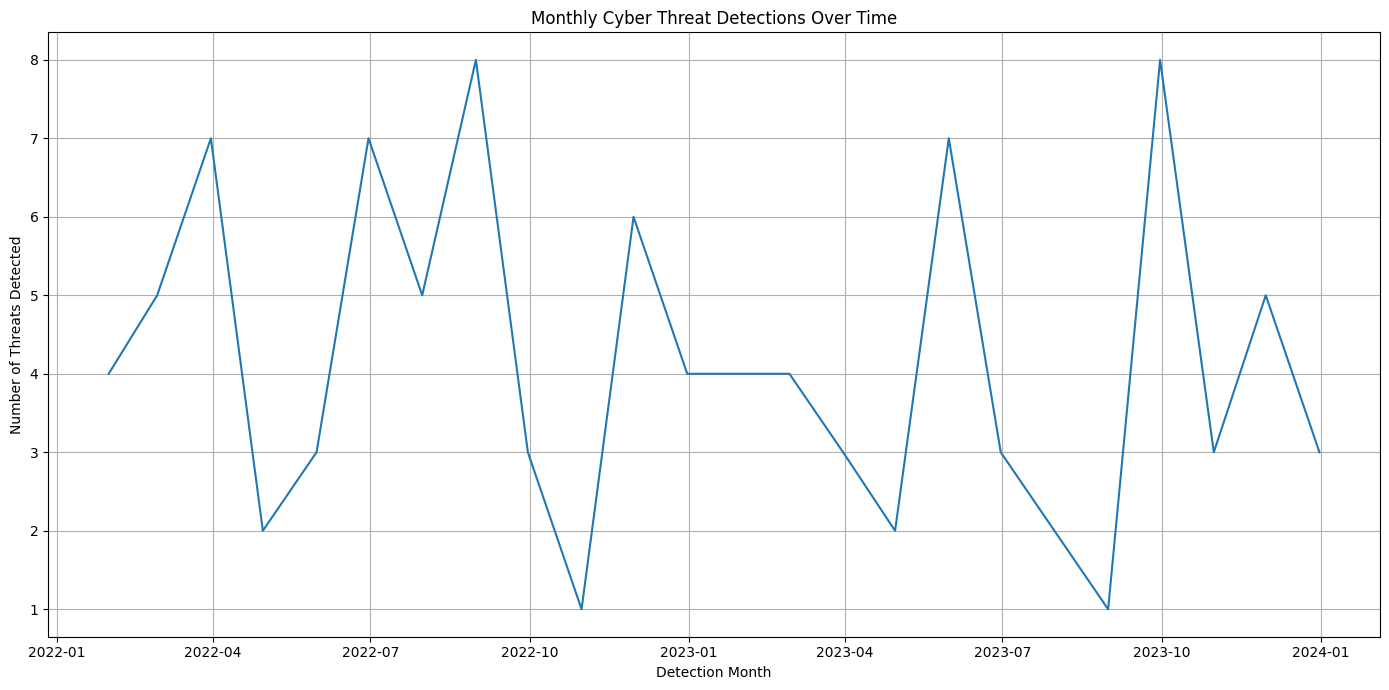

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'Detection_Date' is in datetime format (if not already)
df['Detection_Date'] = pd.to_datetime(df['Detection_Date'])

# Resample data to monthly frequency and sum the threat counts
monthly_threats = df.set_index('Detection_Date').resample('ME').size().reset_index(name='Monthly_Threat_Count')

# Create a line plot for monthly time series analysis of threat counts
plt.figure(figsize=(14, 7))
sns.lineplot(x='Detection_Date', y='Monthly_Threat_Count', data=monthly_threats)
plt.title('Monthly Cyber Threat Detections Over Time')
plt.xlabel('Detection Month')
plt.ylabel('Number of Threats Detected')
plt.grid(True)
plt.tight_layout()
plt.show()

## **Prompt used for Analysis of Most Used systems for detection of cyber attacks**

analyze the most used detection methods for cyber attacks

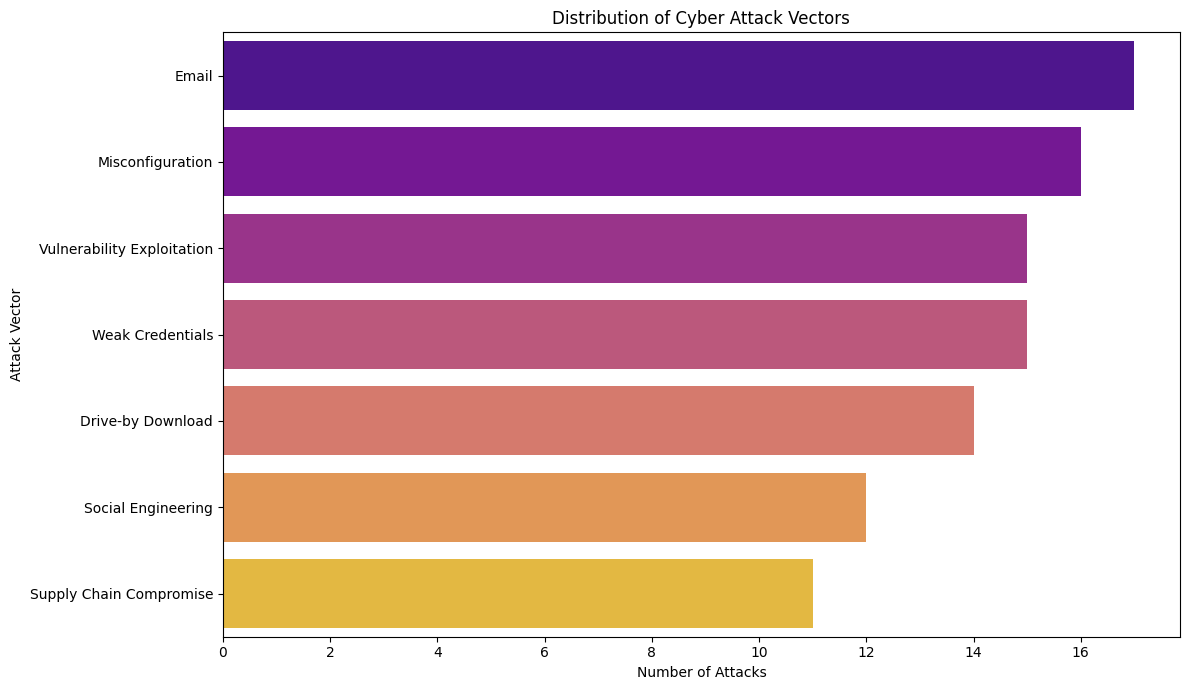

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each attack vector
attack_vector_counts = df['Attack_Vector'].value_counts().reset_index()
attack_vector_counts.columns = ['Attack_Vector', 'Count']

# Create a bar chart for attack vector distribution
plt.figure(figsize=(12, 7))
sns.barplot(x='Count', y='Attack_Vector', data=attack_vector_counts, hue='Attack_Vector', palette='plasma', legend=False)
plt.title('Distribution of Cyber Attack Vectors')
plt.xlabel('Number of Attacks')
plt.ylabel('Attack Vector')
plt.tight_layout()
plt.show()

## **Prompt used for Analysis of status of Cyber attacks**

analyse the percentage distribution of different cyber threat statuses

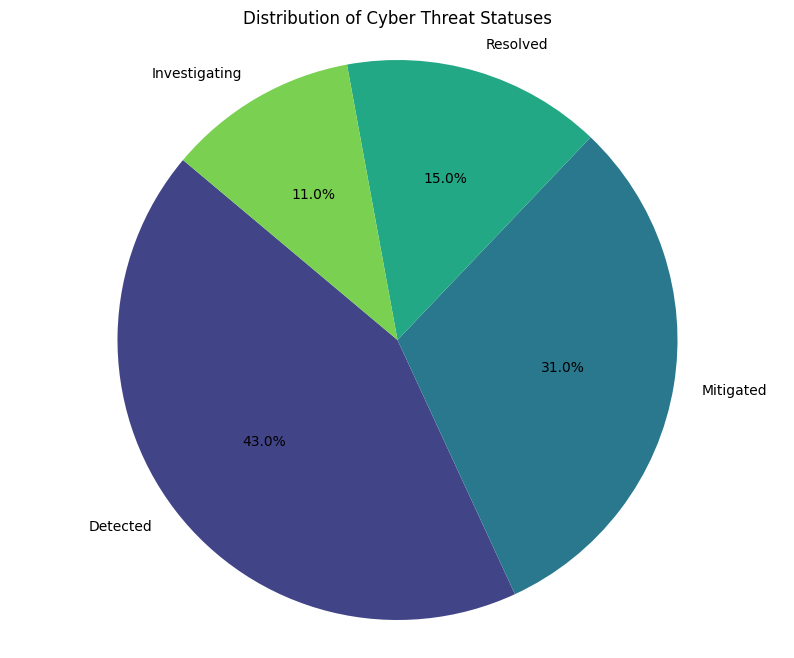

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each status
status_counts = df['Status'].value_counts().reset_index()
status_counts.columns = ['Status', 'Count']

# Define custom colors for better visualization
colors = sns.color_palette('viridis', len(status_counts))

# Create a pie chart for status distribution
plt.figure(figsize=(10, 8))
plt.pie(status_counts['Count'], labels=status_counts['Status'], autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribution of Cyber Threat Statuses')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

## **Prompt used for Analysis of consequences of different attacks**

visualize the understanding of typical consequences of different attacks

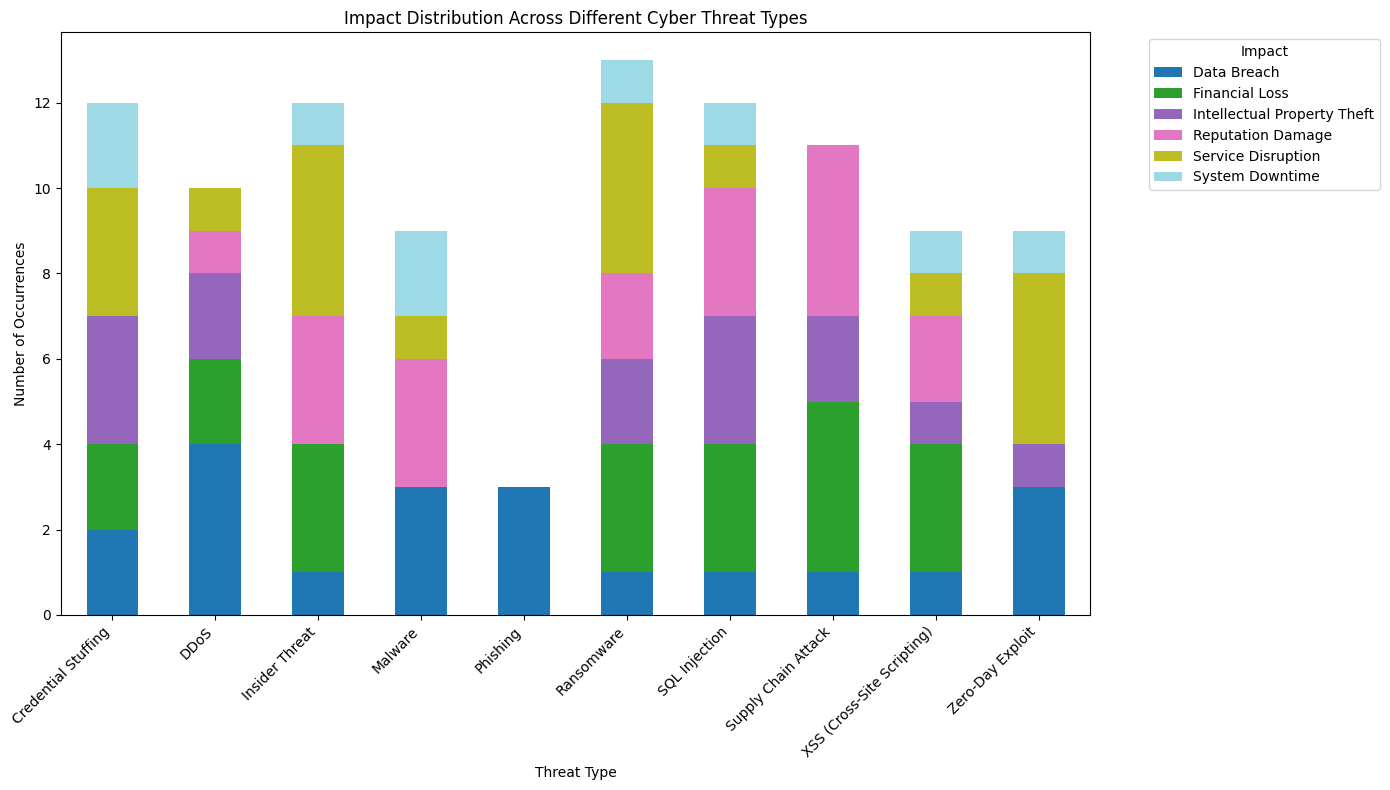

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by Threat_Type and Impact, then count occurrences
impact_by_threat_type = df.groupby(['Threat_Type', 'Impact']).size().unstack(fill_value=0)

# Plotting a stacked bar chart
impact_by_threat_type.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='tab20')
plt.title('Impact Distribution Across Different Cyber Threat Types')
plt.xlabel('Threat Type')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Impact', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()